In [68]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
class Perceptron():
    # Construtor
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter # numero maximo de iteracoes
        self.W = None # pesos serao calculados no treino
        self.b = None # vies sera calculado no treino
    
    def activation_func(self, net_input): # net_input é calculado a partir da funcao wx + b
        # funcao de ativacao
        return np.where(net_input>0, 1, 0) 
    
    def fit(self, X_train, y):
        n_ex, n_features = X_train.shape
        # inicializando pesos e vies de forma aleatoria
        self.W = np.random.uniform(size=n_features, low=-0.5, high=0.5)
        self.b = np.random.uniform(low=-0.5, high=0.5)
        
        for _ in range(self.n_iter): # loop com o maximo de iteracoes definido anteriormente
            for x_index, x_features in enumerate(X_train):
                net_input = np.dot(x_features, self.W) + self.b 
                y_predicted = self.activation_func(net_input)
                self._update_weights(x_features, y[x_index], y_predicted)

    def _update_weights(self, x_features, y_actual, y_predicted): # atualizando os pesos a partir do erro calculado
        error = y_actual - y_predicted # erro calculado a partir da predicao de y
        weights_correction = self.learning_rate * error 
        self.W += weights_correction * x_features 
        self.b += weights_correction * error # atualizando o vies
    
    def predict(self, X_train): # predicao de y a partir da formula Activation(wx + b)
        net_input = np.dot(X_train, self.W) + self.b
        y_predicted = self.activation_func(net_input)
        return y_predicted
    
    def get_weights(self):
        return self.W
    
    def get_bias(self):
        return self.b

In [132]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [133]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

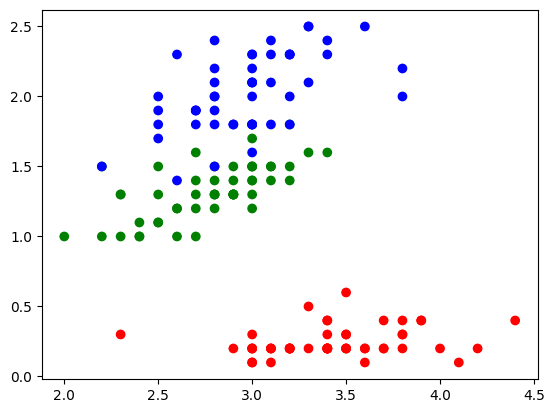

In [134]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

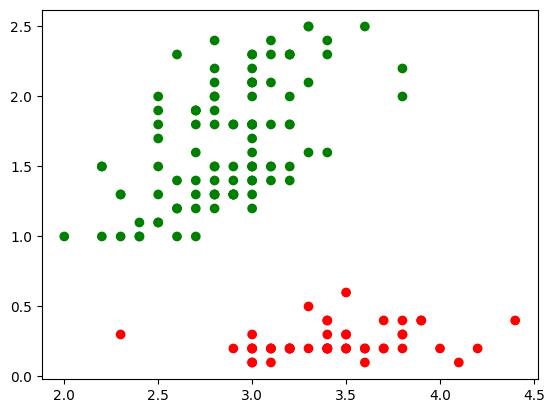

In [135]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'green', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

In [136]:
df = iris_df.drop(['sepal length (cm)', 'petal length (cm)'], axis = 1)
df['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1.0, 0.0, 0.0], inplace=True) 
# irei utilizar os valores da subespecie setos vs virginica+versicolor para o teste, entao foi usado o valor 1 para setosa e 0 para os outros
df.head()

,sepal width (cm),petal width (cm),species
0,3.5,0.2,1.0
1,3.0,0.2,1.0
2,3.2,0.2,1.0
3,3.1,0.2,1.0
4,3.6,0.2,1.0


In [137]:
y = df[['species']] # labels
y.head()

,species
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [138]:
X = df[['sepal width (cm)', 'petal width (cm)']] # os inputs utilizados serao a largura da petala e da sepala
X.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [141]:
# utilizando apenas os valores dos inputs e dos labels
X1 = X.values 
y1 = y.values.flatten()

In [143]:
perceptron = Perceptron()
perceptron.fit(X1, y1)

predictions = [perceptron.predict(x) for x in X1]

accuracy = np.mean(predictions == y1)*100

print(f'Acurácia: {accuracy:.3f}')

Acurácia: 100.000


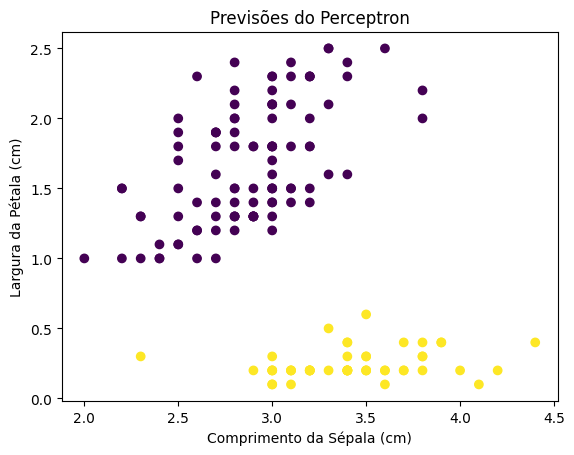

In [144]:
plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')
plt.show()

In [148]:
w1, w2 = perceptron.get_weights()
bias = perceptron.get_bias()

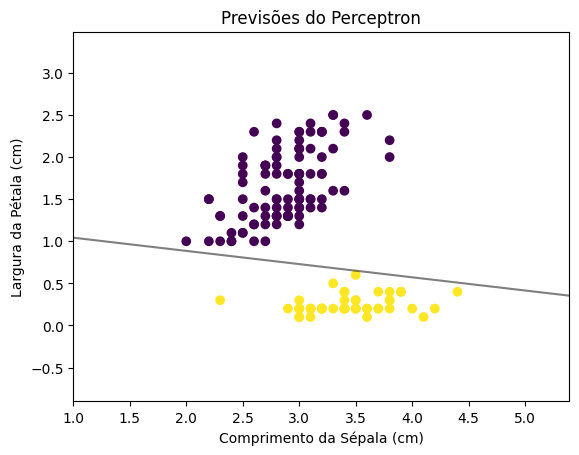

In [149]:
# criando uma grade para o hiperplano
sepal_min, sepal_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
petal_min, petal_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(sepal_min, sepal_max, 0.01), np.arange(petal_min, petal_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], np.array([w1, w2])) + bias
Z = Z.reshape(xx.shape)

# Plot dos valores calculados
plt.scatter(X1[:, 0], X1[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.title('Previsões do Perceptron')

# Plot do hiperplano de decisão
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.show()